In [14]:
from pydantic import BaseModel, Field, Extra
from glob import glob
from jwst import datamodels 
from tqdm import tqdm
from typing import List

class JWSTImage(BaseModel):
    class Config:
        extra = Extra.forbid
    filter: str
    path: str
    type: str = Field(...,alias="type")
    position_number: int


class AllFiles(BaseModel):
    __root__ : List[JWSTImage]

files = glob('./volumes/jwst_data/*/*/*.fits')
#im =  datamodels.open(files[0])
#type(im).__name__



In [15]:
images = []

files = glob('./volumes/jwst_data/*/*/*.fits')
with tqdm(total=len(files)) as pbar:
    for i, x in enumerate(files):
        with datamodels.open(x) as im:
            image = JWSTImage(filter=im.meta.instrument.filter, path=x, type=type(im).__name__, position_number=im.meta.dither.position_number)
            images.append(image)
            pbar.update(1)
        
        

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315/315 [03:56<00:00,  1.33it/s]


In [16]:
with open("image_list.json", 'w') as f:
    f.write(AllFiles(__root__=images).json(indent=4))


In [18]:
set([ image.position_number for image in images ])
set([ image.filter for image in images ])
set([ image.filter for image in images if image.position_number ==1])
#len(files)


{'F090W',
 'F1130W',
 'F1280W',
 'F1800W',
 'F187N',
 'F200W',
 'F335M',
 'F444W',
 'F770W'}

In [10]:
[ image.filter for image in images if image.position_number ==1 and image.path.startswith("./volumes/jwst_data/jw02731/jw02731001001/") and 'rateints' in image.path and '00001' in image.path]



['F187N',
 'F187N',
 'F187N',
 'F187N',
 'F444W',
 'F187N',
 'F187N',
 'F187N',
 'F187N',
 'F444W',
 'F090W',
 'F090W',
 'F090W',
 'F090W',
 'F335M',
 'F090W',
 'F090W',
 'F090W',
 'F090W',
 'F335M',
 'F200W',
 'F200W',
 'F200W',
 'F200W',
 'F444W',
 'F200W',
 'F200W',
 'F200W',
 'F200W',
 'F444W']

In [11]:
len(glob('./volumes/jwst_data/*/*/*.fits'))

2879

In [17]:
unique_filters

NameError: name 'unique_filters' is not defined

In [29]:
from deepdiff import DeepDiff
import json
path = "./volumes/jwst_data/jw02731/jw02731002004/"
file1="jw02731002004_02107_00005_mirimage_rate.fits"
file2="jw02731002004_02107_00006_mirimage_rate.fits"
im1 = datamodels.open(path+file1)
im2 = datamodels.open(path+file2)

d1 = im1.meta.__dict__
d2 = im2.meta.__dict__

diff = DeepDiff(d1, d2)
with open('diff.json', 'w') as f:
    f.write(str(json.dumps(diff)))


512.77s - Error inserting pydevd breaks.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/pydevd_modify_bytecode.py", line 328, in insert_pydevd_breaks
    for new_instruction in get_instructions_to_add(
  File "/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/pydevd_modify_bytecode.py", line 102, in get_instructions_to_add
    Instr("LOAD_CONST", _pydev_stop_at_break, lineno=stop_at_line - 1),
  File "/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendored/bytecode/instr.py", line 171, in __init__
    self._set(name, arg, lineno)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendored/bytecode/instr.py", line 239, in _set
    _check_lineno(lineno)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendored/bytecode/instr.py", line 74, in _check_lineno
 

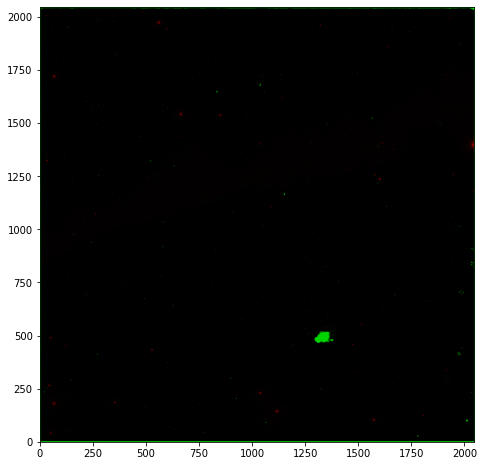

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb

forc=np.float_()
f1="/workspace/volumes/jwst_data/jw02731/jw02731001001/jw02731001001_02101_00001_nrca1_rate.fits"
f2="/workspace/volumes/jwst_data/jw02731/jw02731001001/jw02731001001_02101_00001_nrca2_rate.fits"
f3="/workspace/volumes/jwst_data/jw02731/jw02731001001/jw02731001001_02101_00001_nrca3_rate.fits"
r=fits.open(f1)[1].data
g=fits.open(f1)[3].data
b=fits.open(f1)[4].data

r = np.array(r,forc)*5
g = np.array(g,forc)*0.75
b = np.array(b,forc)*8

t = 250
r[r > t] = t
g[g > t] = t
b[b > t] = t

rgb_default = make_lupton_rgb(r,g,b,Q=0.001,stretch=300,filename="pillar.png")
plt.figure(figsize=(8,8))
plt.imshow(rgb_default, origin='lower')
plt.show()
